## Installing and importing dependencies

In [2]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [3]:
# !git clone https://github.com/ultralytics/yolov5  # clone
# !cd yolov5
# !pip install -r requirements.txt  # install

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Loading model

In [35]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/darth/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-28 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Make detection with images

In [3]:
# Images
img = "https://ultralytics.com/images/zidane.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1491.7ms pre-process, 134.2ms inference, 1.1ms NMS per image at shape (1, 3, 384, 640)


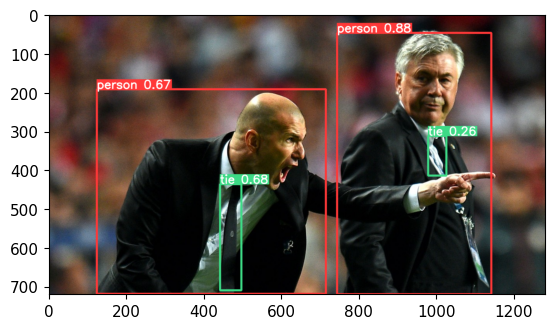

In [4]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
# results.render()

## Realtime Detection

In [36]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # cv2.imshow('YOLO', frame)
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread

## Train from scratch

In [2]:
import uuid   # Unique identifier
import os
import time

In [60]:
directory = "data/images"

# Check if the directory exists
if not os.path.exists(directory):
    # Create the directory
    os.makedirs(directory)
    print(f"Directory '{directory}' created successfully.")
else:
    print(f"Directory '{directory}' already exists.")

Directory 'data/images' created successfully.


In [61]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10

In [63]:
cap = cv2.VideoCapture(0)
# Loop through labels
label = 'drowsy'
print('Collecting images for {}'.format(label))
time.sleep(5)
    
    # Loop through image range
for img_num in range(number_imgs):
    print('Collecting images for {}, image number {}'.format(label, img_num))
    
    # Webcam feed
    ret, frame = cap.read()
    
    # Naming out image path
    imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
    
    # Writes out image to file 
    cv2.imwrite(imgname, frame)
    
    # Render to the screen
    cv2.imshow('Image Collection', frame)
    
    # 2 second delay between captures
    time.sleep(2)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread (0xa1519d0).
Cannot move to target thread (0x7965150)

QObject::moveToThread: Current thread (0x7965150) is not the object's thread

In [64]:
# Code to run the whole loop
# cap = cv2.VideoCapture(0)
# # Loop through labels
# for label in labels:
#     print('Collecting images for {}'.format(label))
#     time.sleep(5)
    
#     # Loop through image range
#     for img_num in range(number_imgs):
#         print('Collecting images for {}, image number {}'.format(label, img_num))
        
#         # Webcam feed
#         ret, frame = cap.read()
        
#         # Naming out image path
#         imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
#         # Writes out image to file 
#         cv2.imwrite(imgname, frame)
        
#         # Render to the screen
#         cv2.imshow('Image Collection', frame)
        
#         # 2 second delay between captures
#         time.sleep(2)
        
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
# cap.release()
# cv2.destroyAllWindows()

In [20]:
# !pip install pyqt5 lxml labelImg

In [ ]:
# !labelImg

In [3]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 126 (delta 92), reused 106 (delta 90), pack-reused 0
Receiving objects: 100% (126/126), 125.04 KiB | 810.00 KiB/s, done.
Resolving deltas: 100% (92/92), completed with 9 local objects.
From https://github.com/ultralytics/yolov5
 * [new branch]      ultralytics

## Load model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/darth/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-29 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [8]:
img = os.path.join('data', 'images', 'awake.234c2a24-fdf5-11ed-bab6-33dc5a42aad3.jpg')
results = model(img)
results.print()

image 1/1: 480x640 1 awake
Speed: 14.5ms pre-process, 245.2ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)


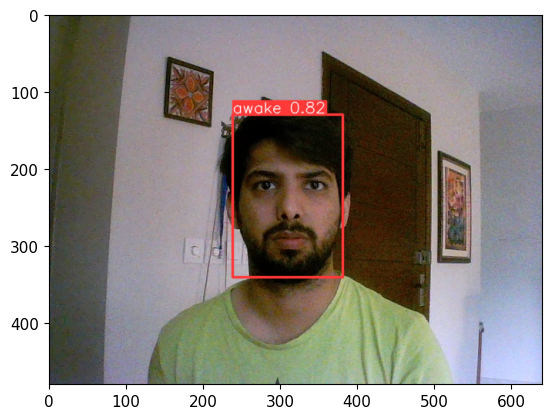

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
img = os.path.join('data', 'images', 'drowsy.414b9f82-fdf5-11ed-bab6-33dc5a42aad3.jpg')
results = model(img)
results.print()

image 1/1: 480x640 1 drowsy
Speed: 10.9ms pre-process, 249.7ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)


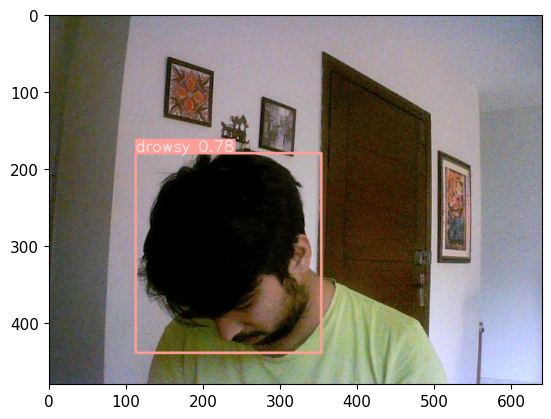

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/darth/MLAI-projects/Yolo/envyolo39/lib/python3.9/site-packages/cv2/qt/plugins"
QObject::moveToThread: Current thread (0x6972720) is not the object's thread (0x7825d30).
Cannot move to target thread (0x6972720)

QObject::moveToThread: Current thread (0x6972720) is not the object's thread (0x7825d30).
Cannot move to target thread (0x6972720)

QObject::moveToThread: Current thread (0x6972720) is not the object's thread (0x7825d30).
Cannot move to target thread (0x6972720)

QObject::moveToThread: Current thread (0x6972720) is not the object's thread (0x7825d30).
Cannot move to target thread (0x6972720)

QObject::moveToThread: Current thread (0x6972720) is not the object's thread (0x7825d30).
Cannot move to target thread (0x6972720)

QObject::moveToThread: Current thread (0x6972720) is not the object's thread (0x7825d30).
Cannot move to target thread (0x6972720)

QObject::moveToThread: Current thread (0x6972720) is not